# Unsupervised Learning: Trade&Ahead


## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [4]:
## Complete the code to import the data
data = pd.read_csv('/content/drive/MyDrive/PythonForDataScience/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [5]:
# checking shape of the data

data.shape

(340, 15)

### Displaying few rows of the dataset

In [9]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [10]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [11]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [12]:
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [13]:
df.drop("Ticker Symbol", axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

### Checking for duplicates and missing values

In [15]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [16]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [18]:
df.describe(include='category').T

,count,unique,top,freq
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


## Exploratory Data Analysis

### Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

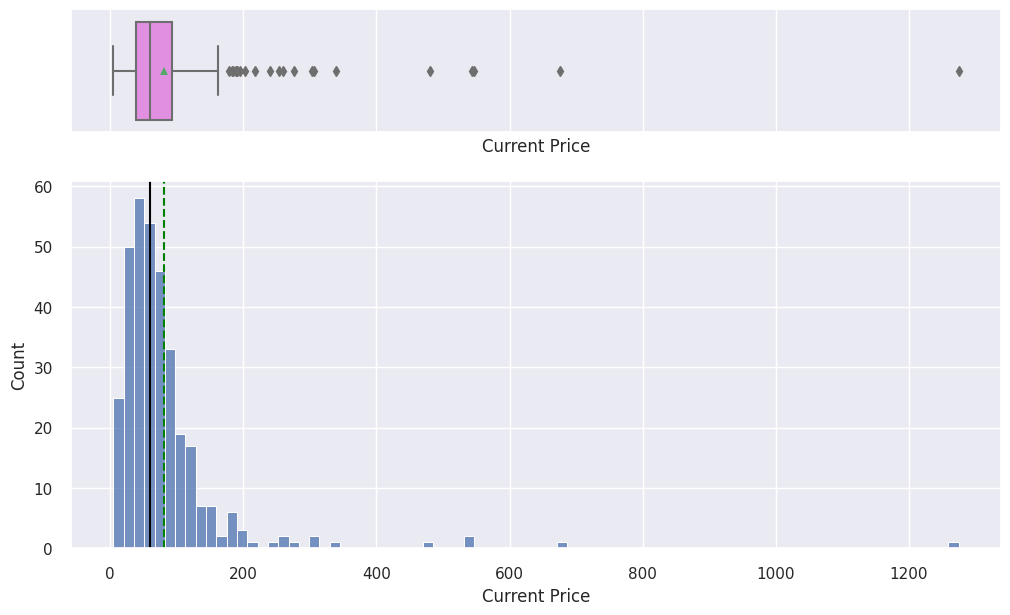

In [20]:
histogram_boxplot(df, 'Current Price')

• The distribution of current price is heavily right-skewed, with a median of 59.7 value of all stocks 340.

• As expected, no stock is listed for less than 0 dollars or 0 dollars.

**`Price Change`**

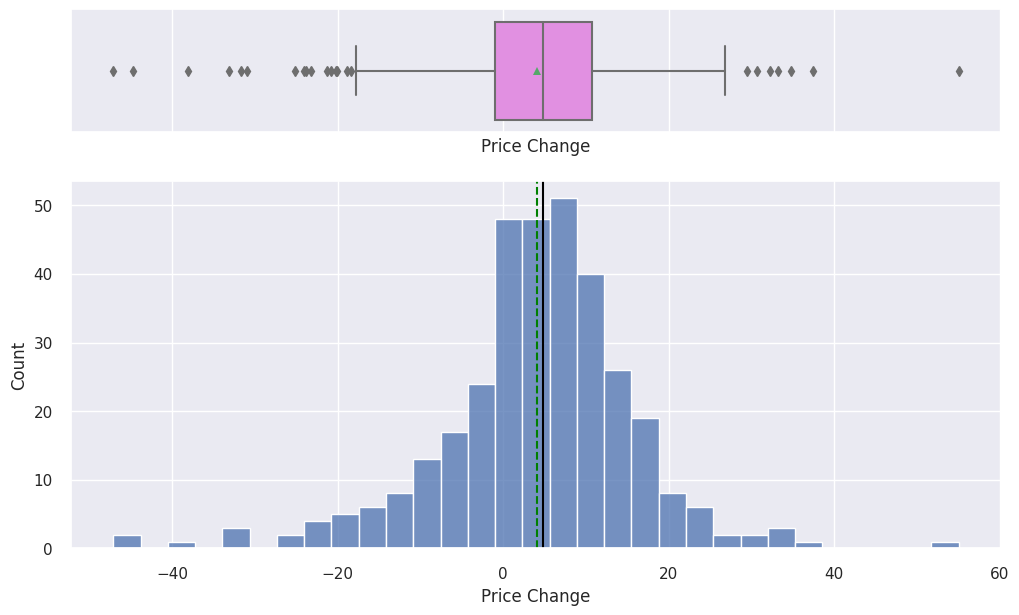

In [21]:
histogram_boxplot(df,'Price Change')

• The distribution of price change has long tails, both for positive and negative price changes.

• The most volatile stocks show as low as a 47% decrease to as high as a 55% increase.

**`Volatility`**

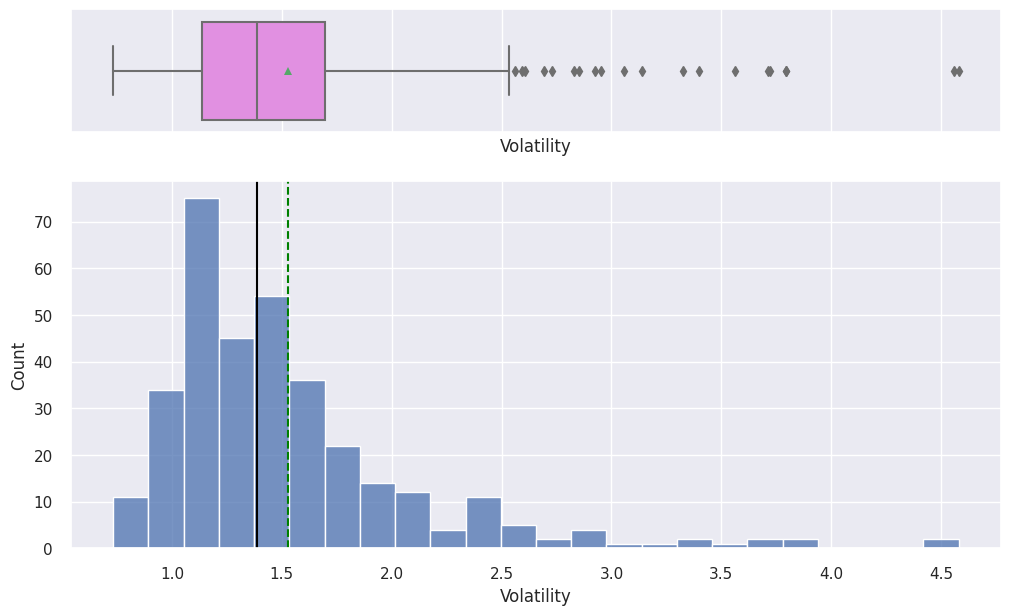

In [22]:
histogram_boxplot(df,'Volatility')

• As expected, the distribution of standard deviations is right- skewed and not normal.

• With min 1.52 and max 4.58.

**`ROE`**

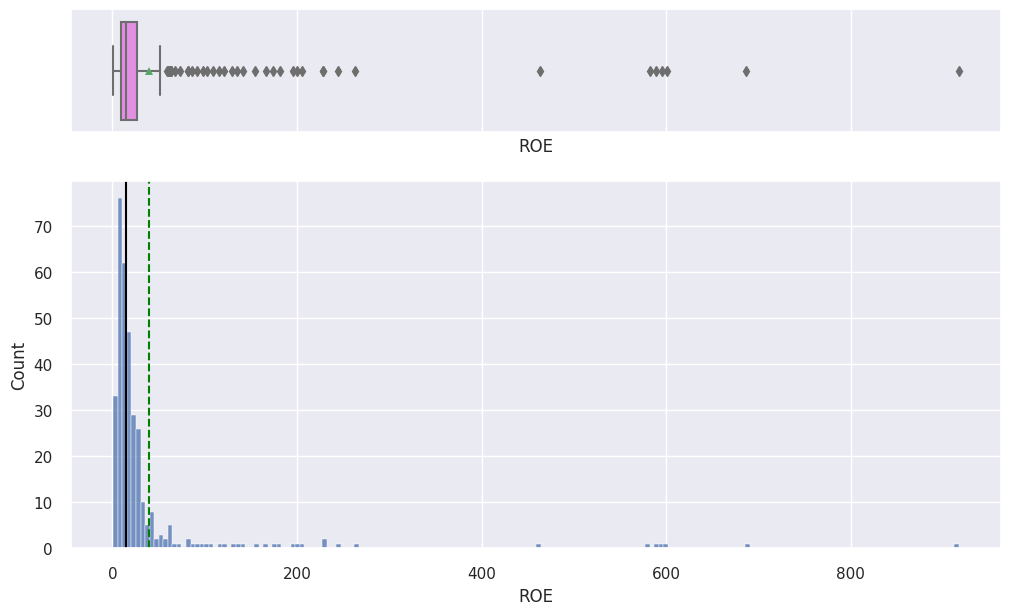

In [23]:
histogram_boxplot(df,'ROE')

● The distribution of ROE is rightly skewed and no stock is listed as less than 0.

**`Cash Ratio`**

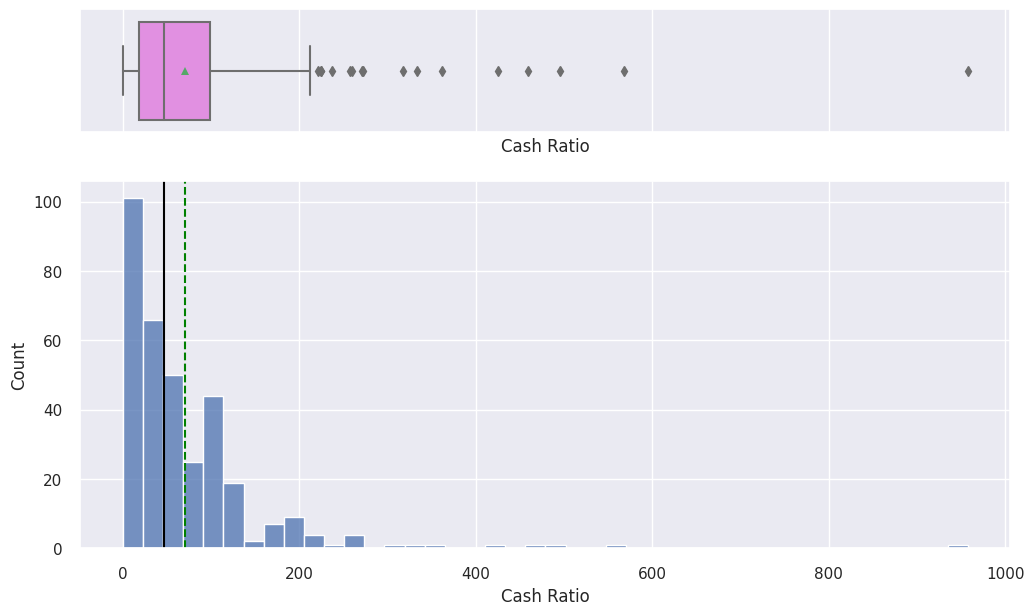

In [24]:
histogram_boxplot(df,'Cash Ratio')

● The distribution of Cash Ration is right -skewed with outliers.

● There is no stock listed less than 0.

**`Net Cash Flow`**

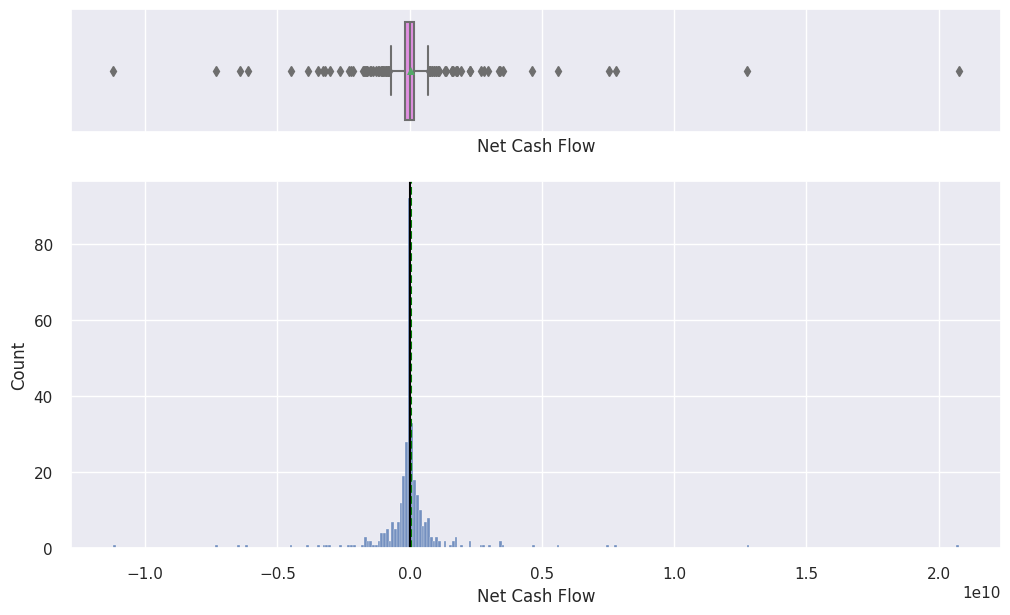

In [25]:
histogram_boxplot(df,'Net Cash Flow')

• The net cash flow for the companies shows a negative outcome as a positive outcome.

• Some companies’ stock is listed with negative returns (-112), and some companies’ stock is listed with positive returns (2074).

**`Net Income`**

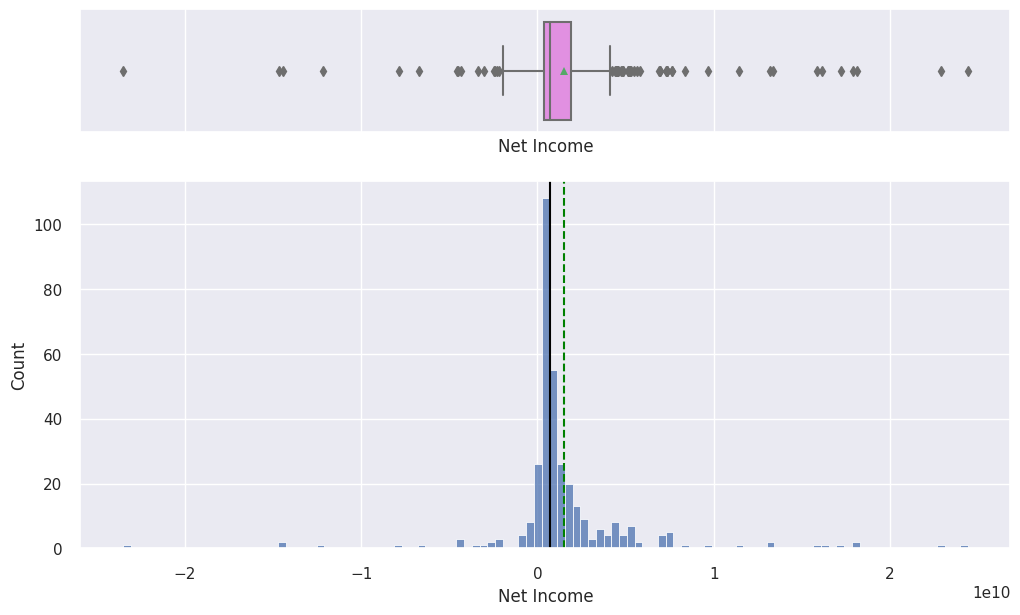

In [26]:
histogram_boxplot(df,'Net Income')

• As expected, net income is shown to be right-skewed with both long positive and negative tails.

• Most companies generate merger profits, but some are failing and some are highly successful.

**`Earnings Per Share`**

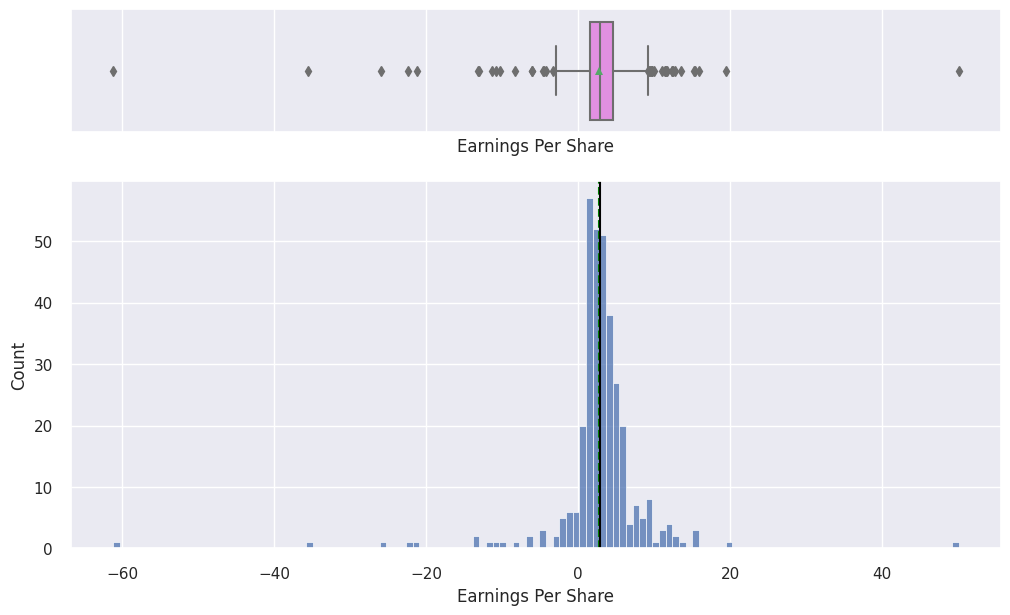

In [27]:
histogram_boxplot(df,'Earnings Per Share')

● Earnings per share show a similar distribution, with most showing low positive values and a few stocks showing negative values

**`Estimated Shares Outstanding`**

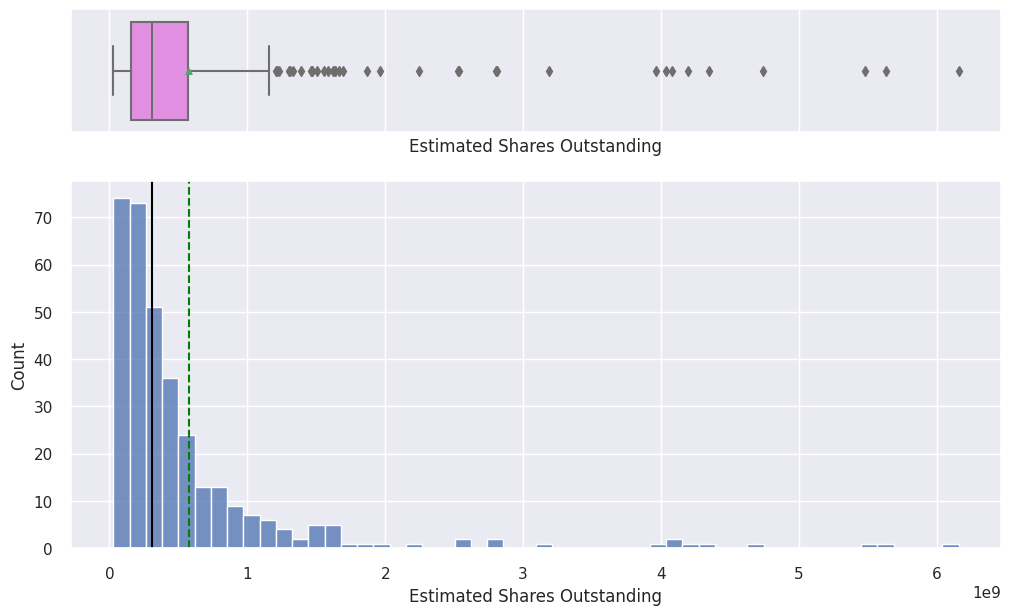

In [28]:
histogram_boxplot(df,'Estimated Shares Outstanding')

● The distribution of estimated shares outstanding is right skewed.

● There are no shares listed as 0 or less than 0.

**`P/E Ratio`**

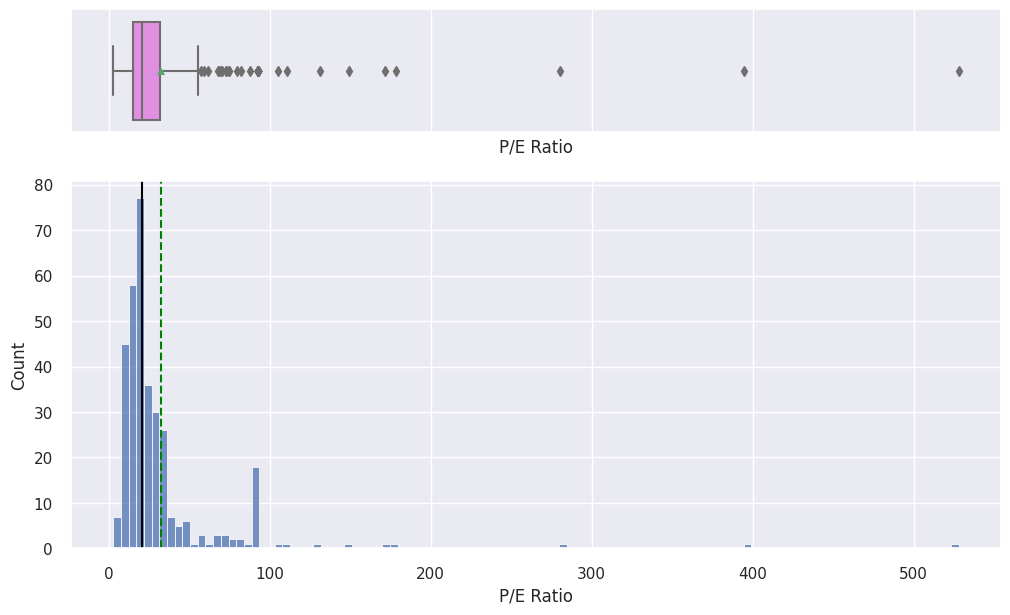

In [29]:
histogram_boxplot(df,'P/E Ratio')

• The P/E ratio distribution is right skewed.

• Interestingly, no stock shows a negative ratio, even though several stocks have a negative EPS and no stock has a price list of less than 0.

**`P/B Ratio`**

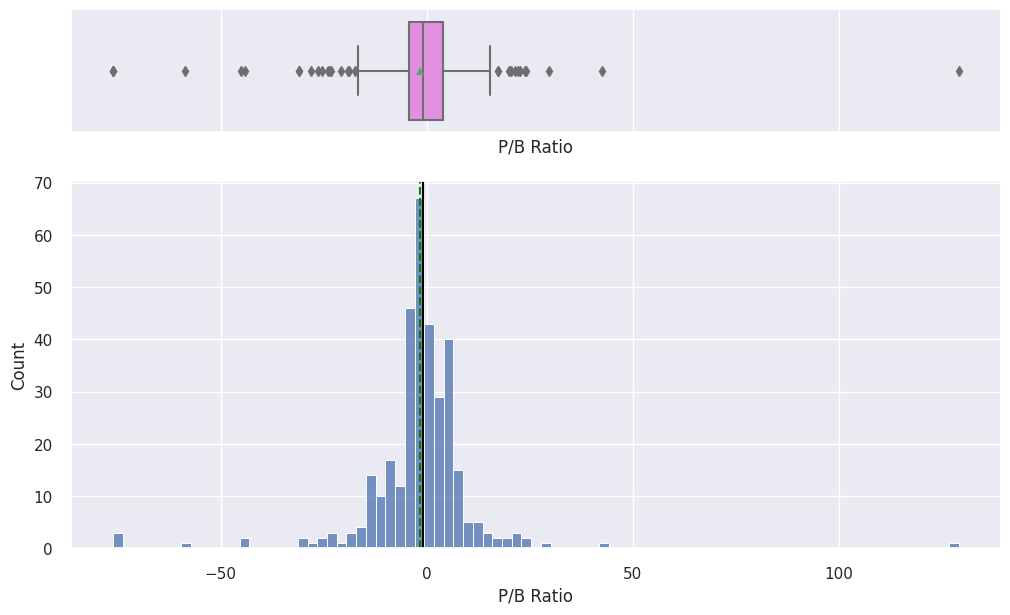

In [30]:
histogram_boxplot(df,'P/B Ratio')

• The distribution for P/B ratios is mostly centered around 0 but with long positive and negative.

In [31]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

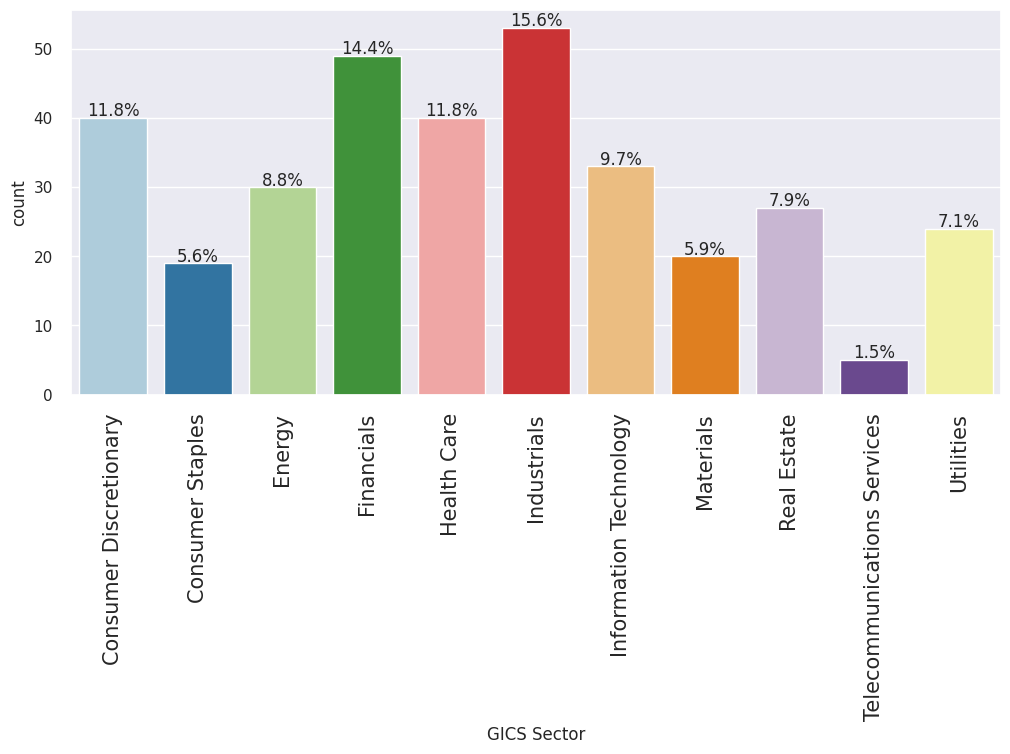

In [32]:
labeled_barplot(df, 'GICS Sector', perc=True)

• The stocks are drawn from 11 different industrial sectors, with no one sector comprising more than 16% of the dataset.

• The top 4 of the 11 sectors (industrials, financials, consumer discretionary, health care) comprise over half of the total number of stocks.

• The least of the industry is telecommunication services.

**`GICS Sub Industry`**

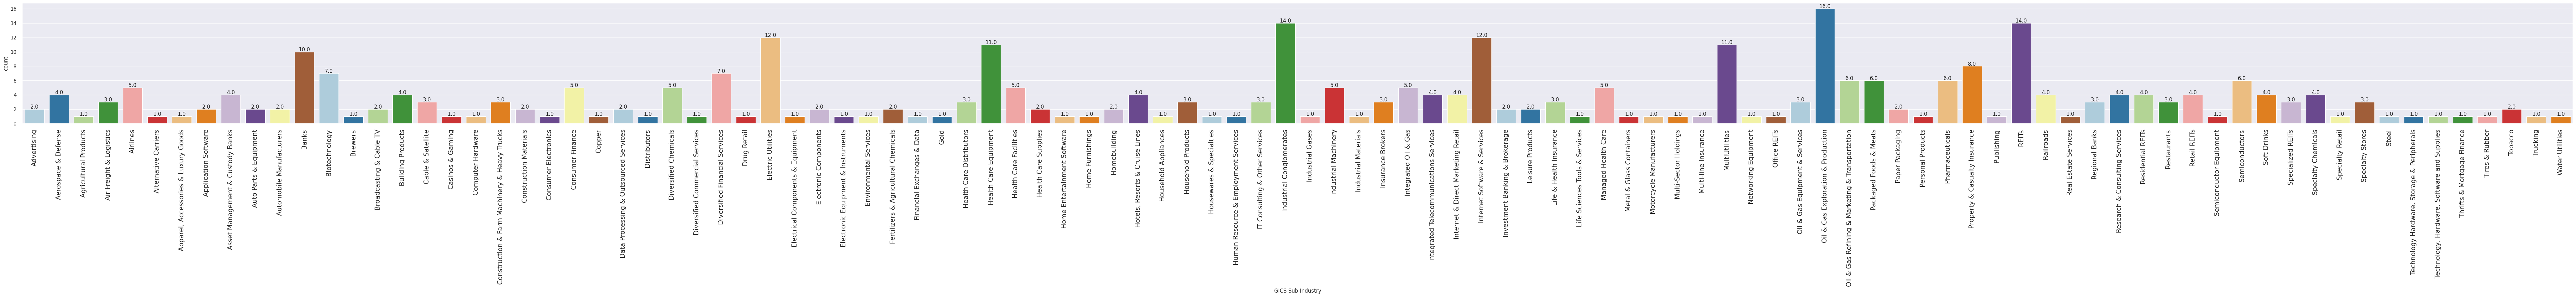

In [33]:
labeled_barplot(df, 'GICS Sub Industry')

### Bivariate Analysis

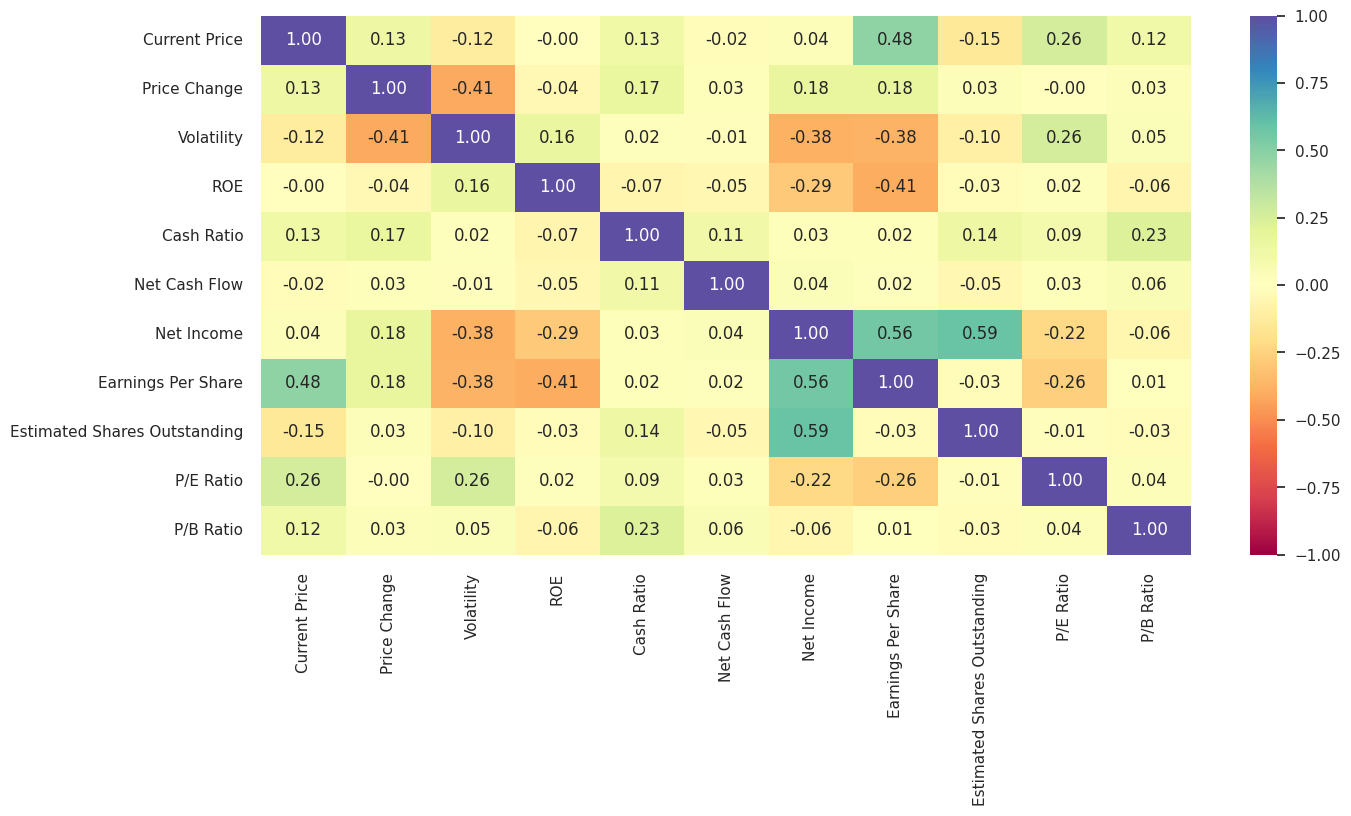

In [34]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

• There is a moderate correlation between variables (+/- .38-59).

• Volatility is negatively correlated with price change as a stock becomes more volatile, its price is likely to drop.

• Net income is also negatively correlated with volatility, as a company generates higher income its price is likely less volatile.

• Net income is positively correlated with earnings per share and estimated shares outstanding.

• Earnings per share are positively correlated with current price as a company’s EPS rises, its prices are also highly to increase.

• EPS is negatively correlated with ROE, as a company generates more equity for shareholders, an equivalent amount of net income in the following periods will generate a lower return.

**Check the stocks of which economic sector have seen the maximum price increase on average.**

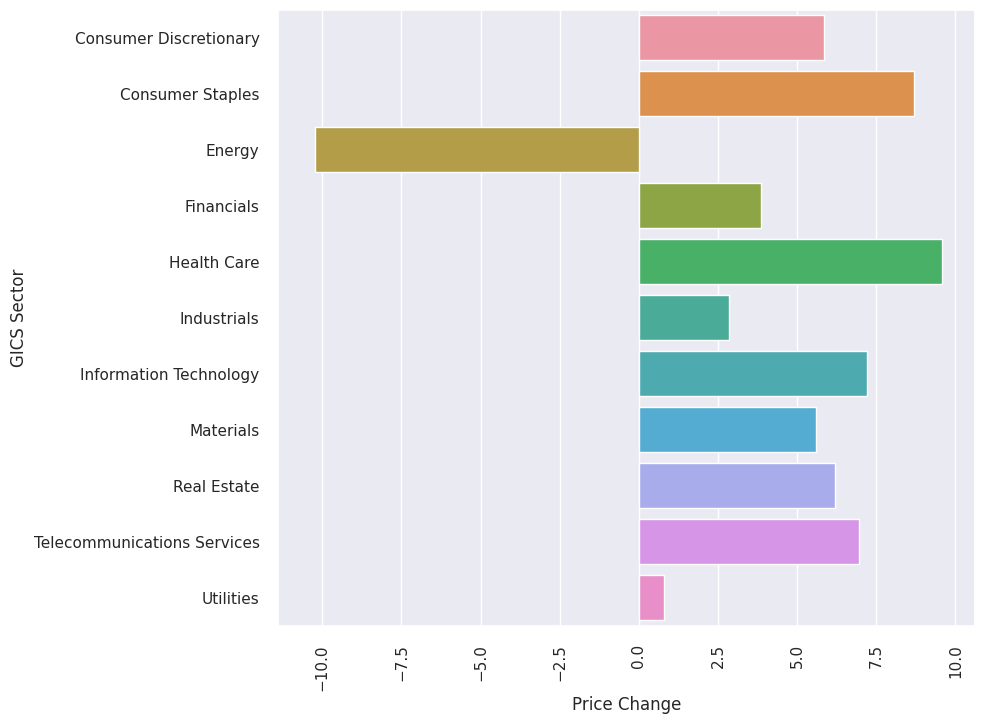

In [35]:
plt.figure(figsize=(9,8))
sns.barplot(data=df, x='Price Change', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

• The stocks of which economic sector have seen the maximum price increase on average are Health Care, followed by Consumer suppliers, and Information Technology.

• The last sector in the price increase on average is Utilities.

• There is a negative tendency of price for the Energy industry.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. ***

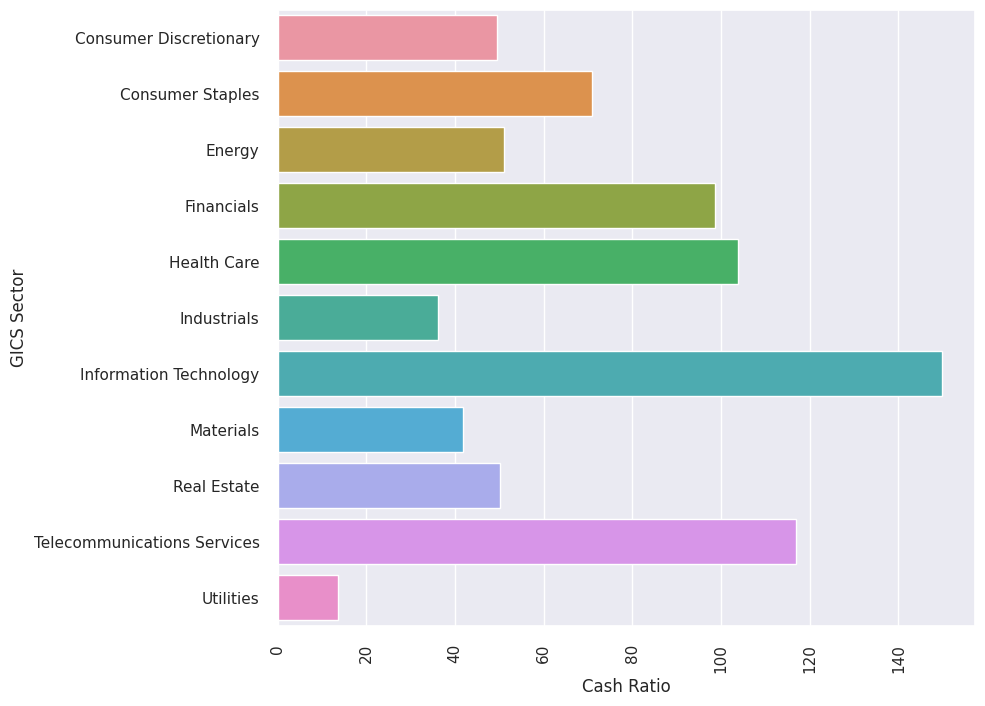

In [36]:
plt.figure(figsize=(9,8))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

• The cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. the average cash ratio varies across economic sectors.

• The industry such as IT, Health Care, and Telecommunication Services have a high ratio. The last ratio is in the utility industry.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

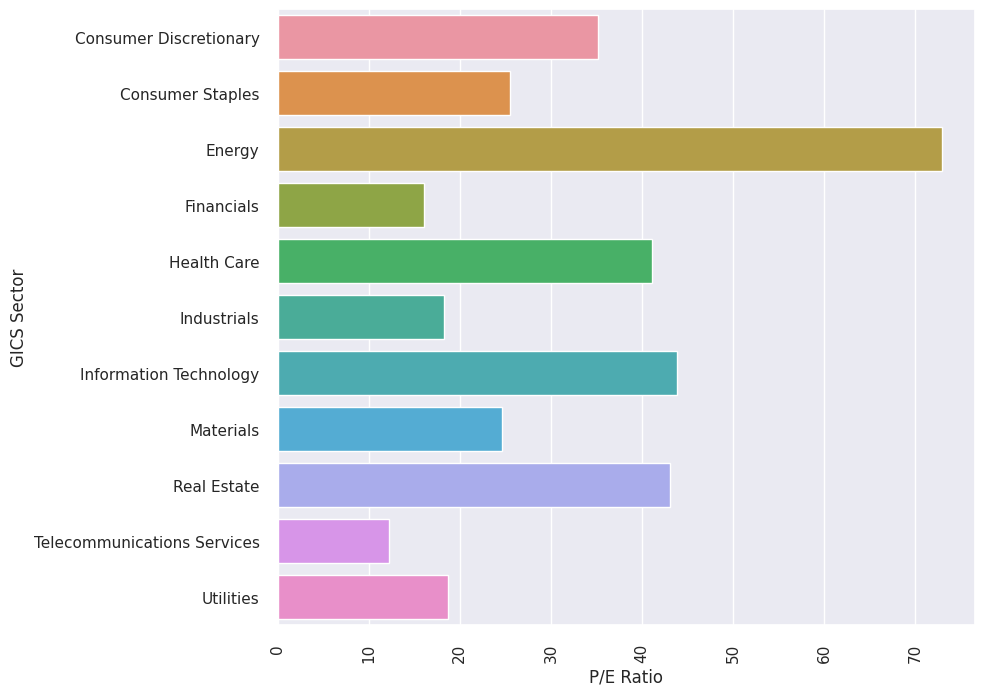

In [37]:
plt.figure(figsize=(9,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

• P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings.

• The highest P/E ratio across economic sectors has Energy Sector followed by IT, and Real Estate.

• The Energy industry has shares as they signify the amount of money and willingness to invest in a single share of a company per dollar of its earnings.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

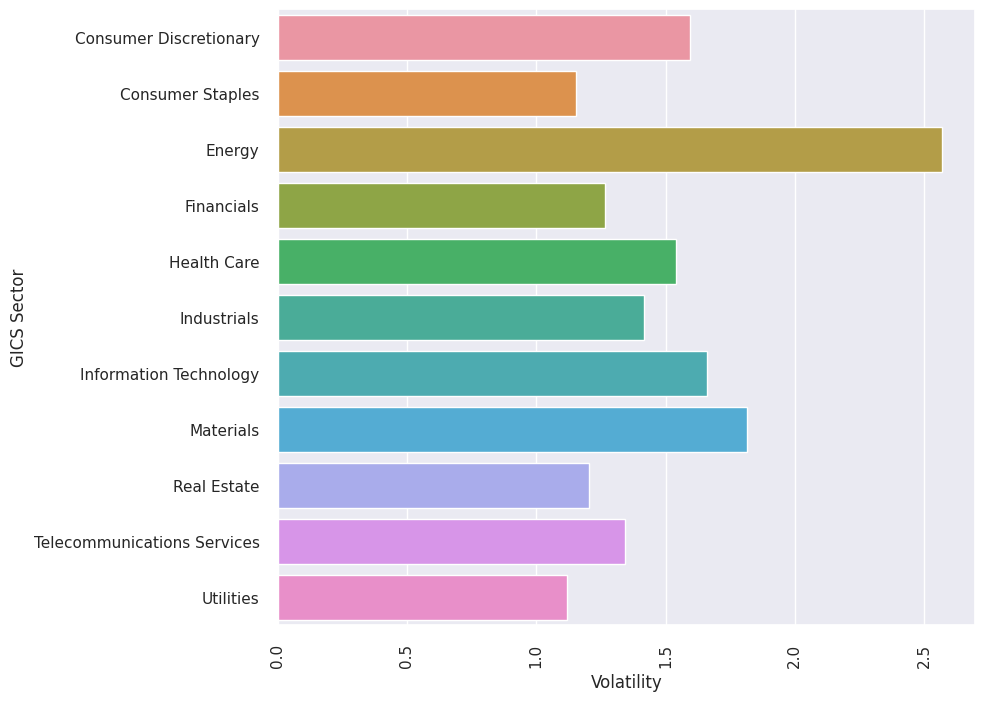

In [38]:
plt.figure(figsize=(9,8))
sns.barplot(data=df, x='Volatility', y='GICS Sector', ci=False)
plt.xticks(rotation=90)
plt.show()

• Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment.

• Volatility varies, on average, across economic sectors, the highest volatility has Energy Sector followed by the Materials sector, and IT.

• A company that has a stock with high volatility will witness sharper price changes, making it a riskier investment.

## Data Preprocessing

### Outlier Check


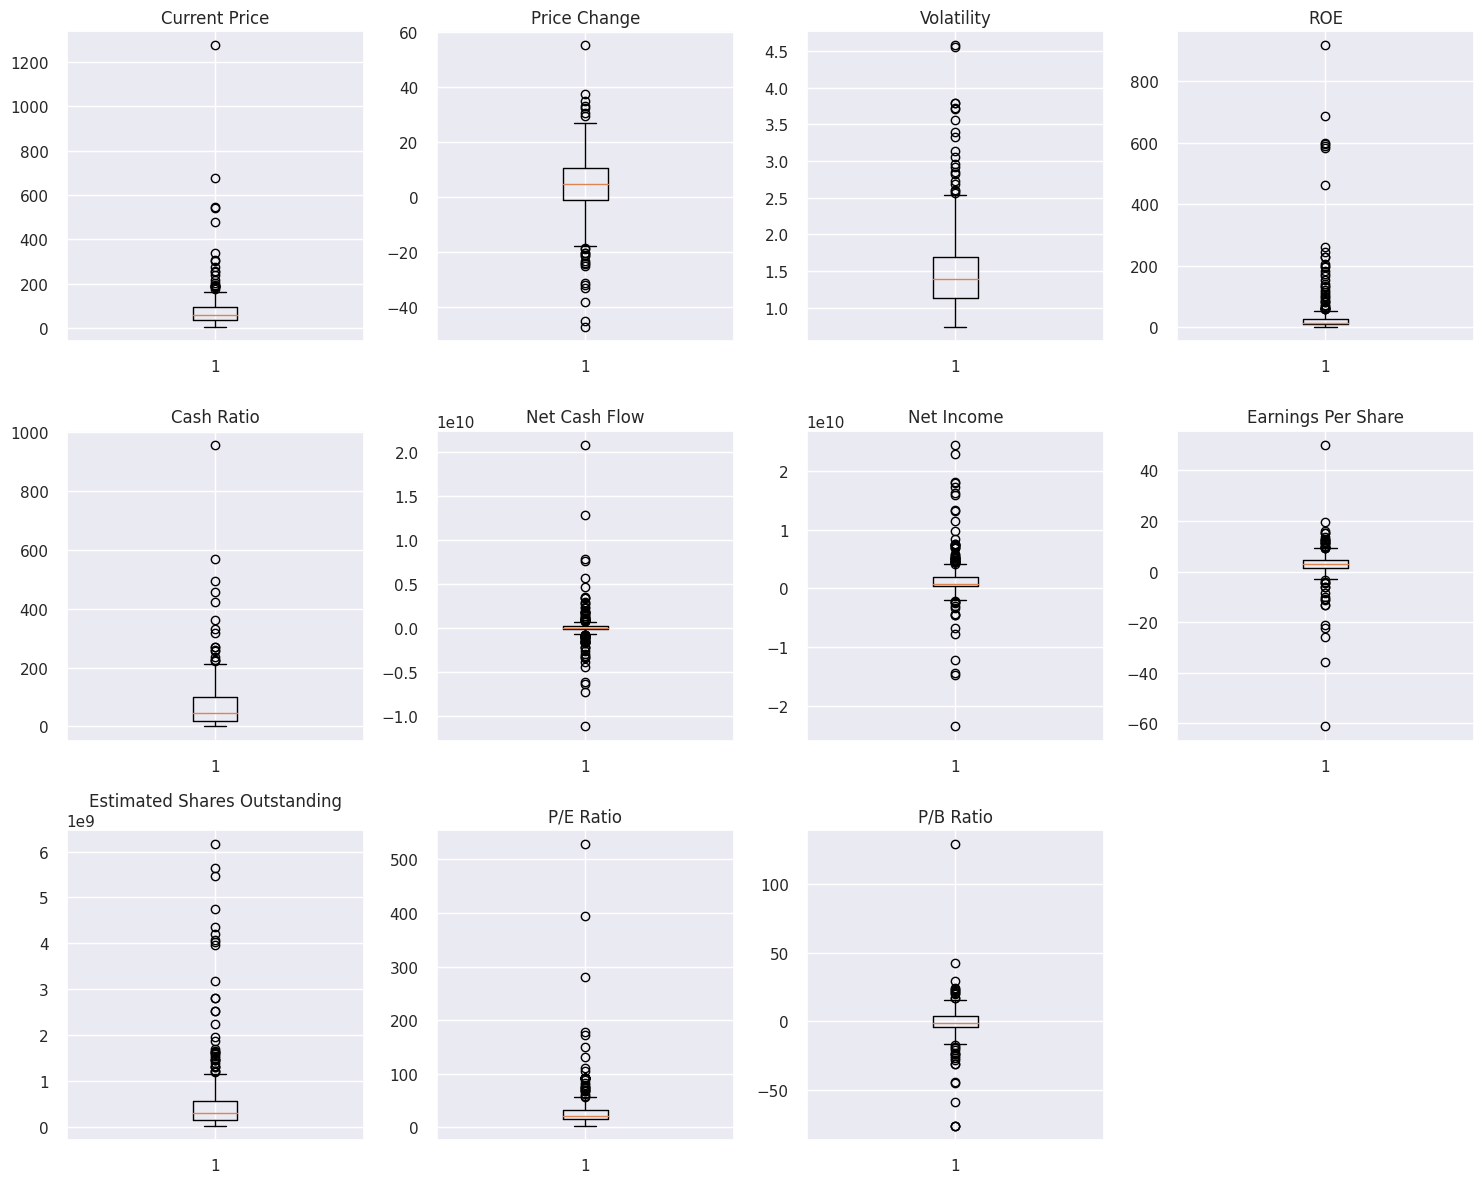

In [39]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

● All the variables have outliers, however, we will not treat them as they have important values to the analysis.

### Scaling

- Let's scale the data before we proceed with clustering.

In [43]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [42]:
num_col=['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']

In [44]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [45]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


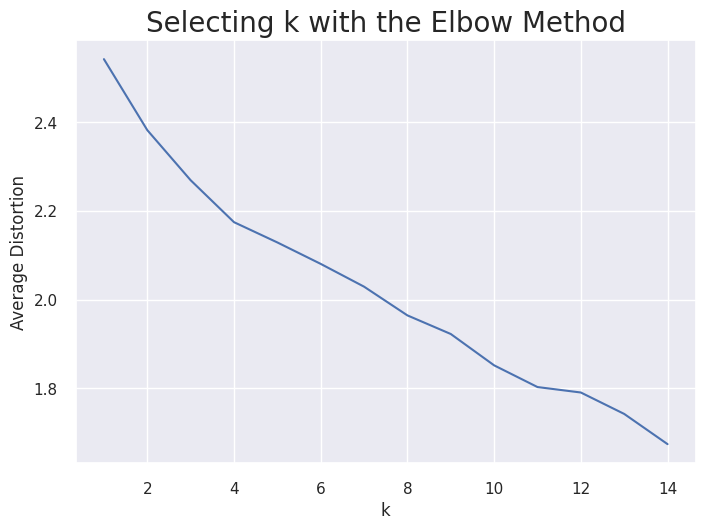

In [46]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

• The appropriate value of k from the elbow curve seems to be 4 or 5.

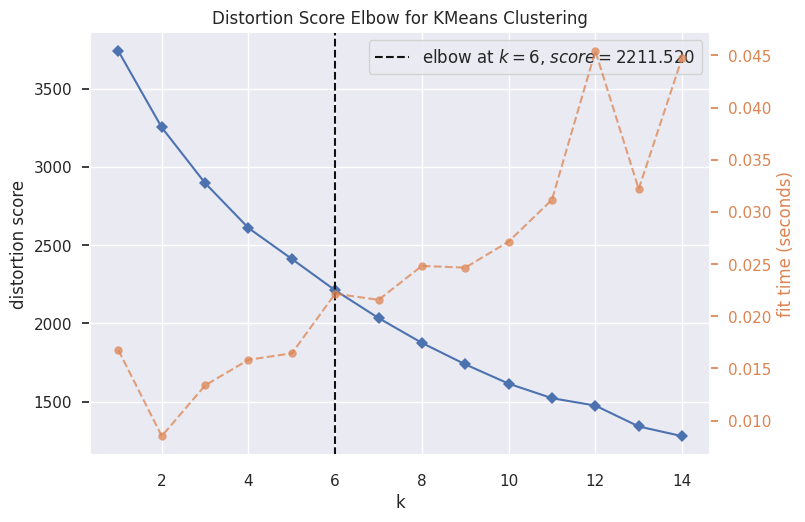

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


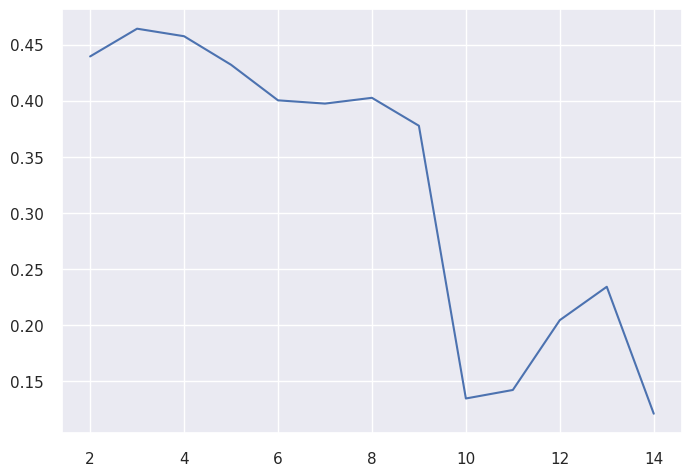

In [48]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

• From the silhouette scores, it seems that 4 is a good value of k.

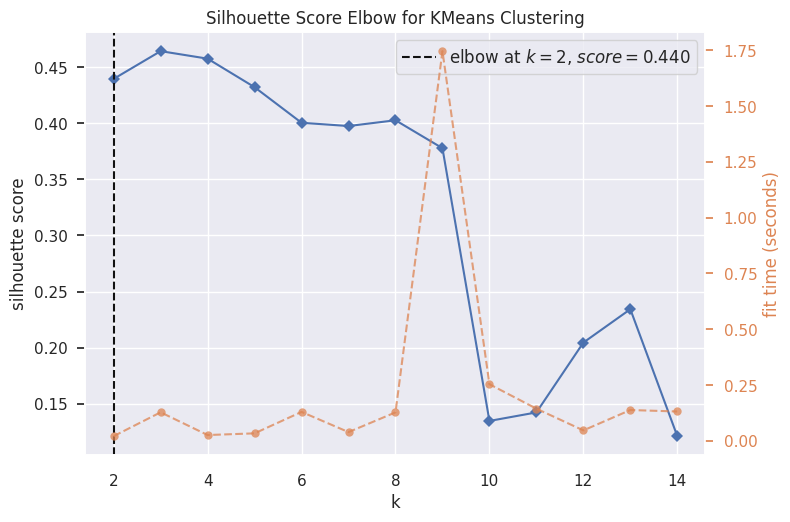

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

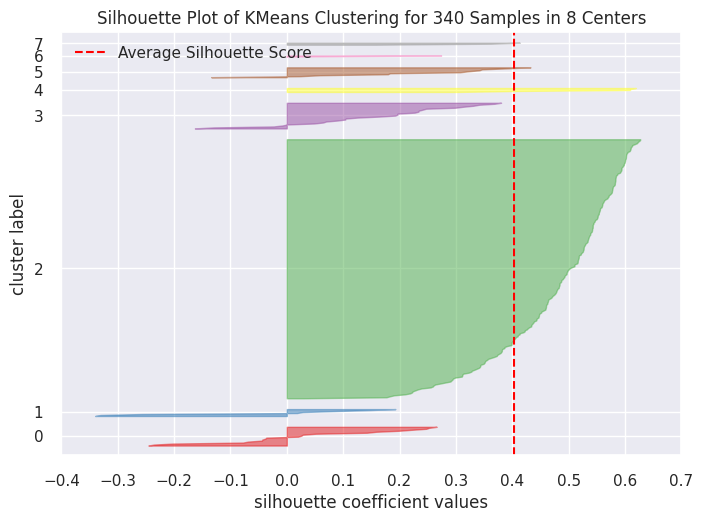

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

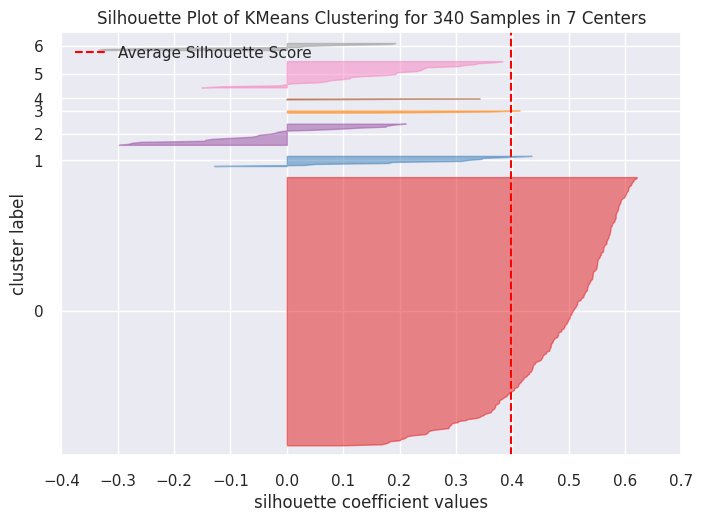

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

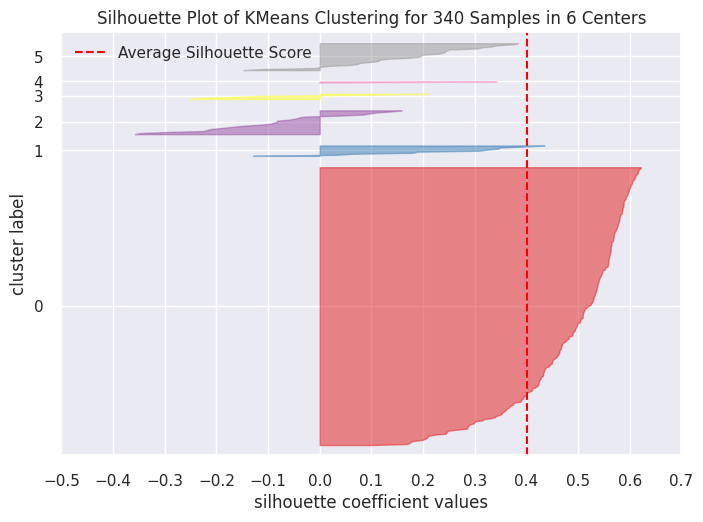

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

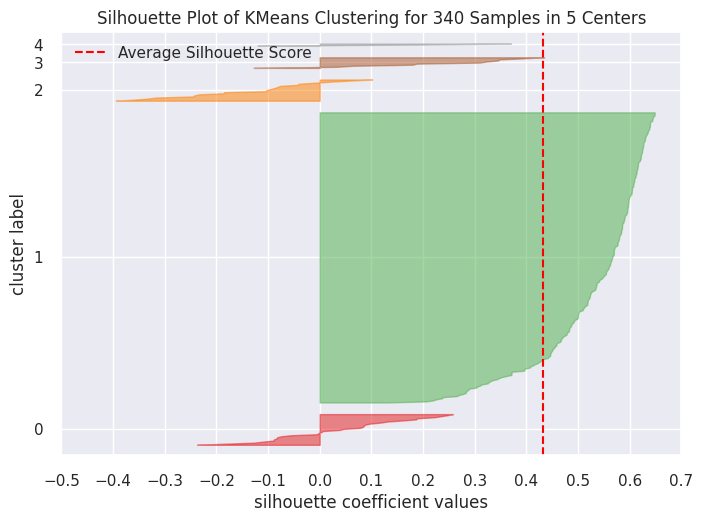

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

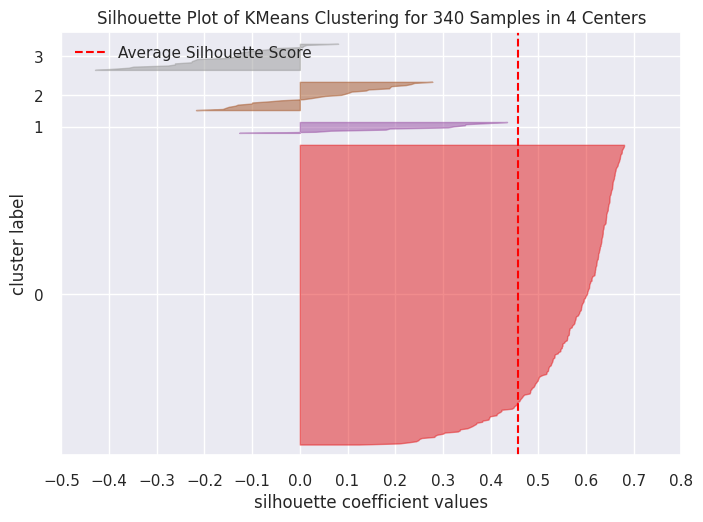

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

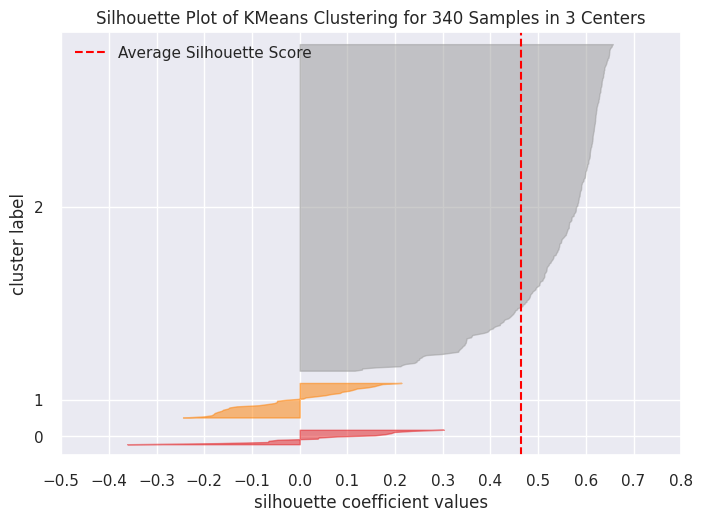

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

• Between the Elbow and Silhouette plots, the number of clusters with the best performance appears to be 4.

### Creating Final Model

In [56]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [57]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [58]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [59]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [60]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [61]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 277
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 3, the following companies are present:
['Analog Devices, Inc.', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 25
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Apache Corporation', 'Anadarko Petroleum Corp', 

In [62]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Teleco

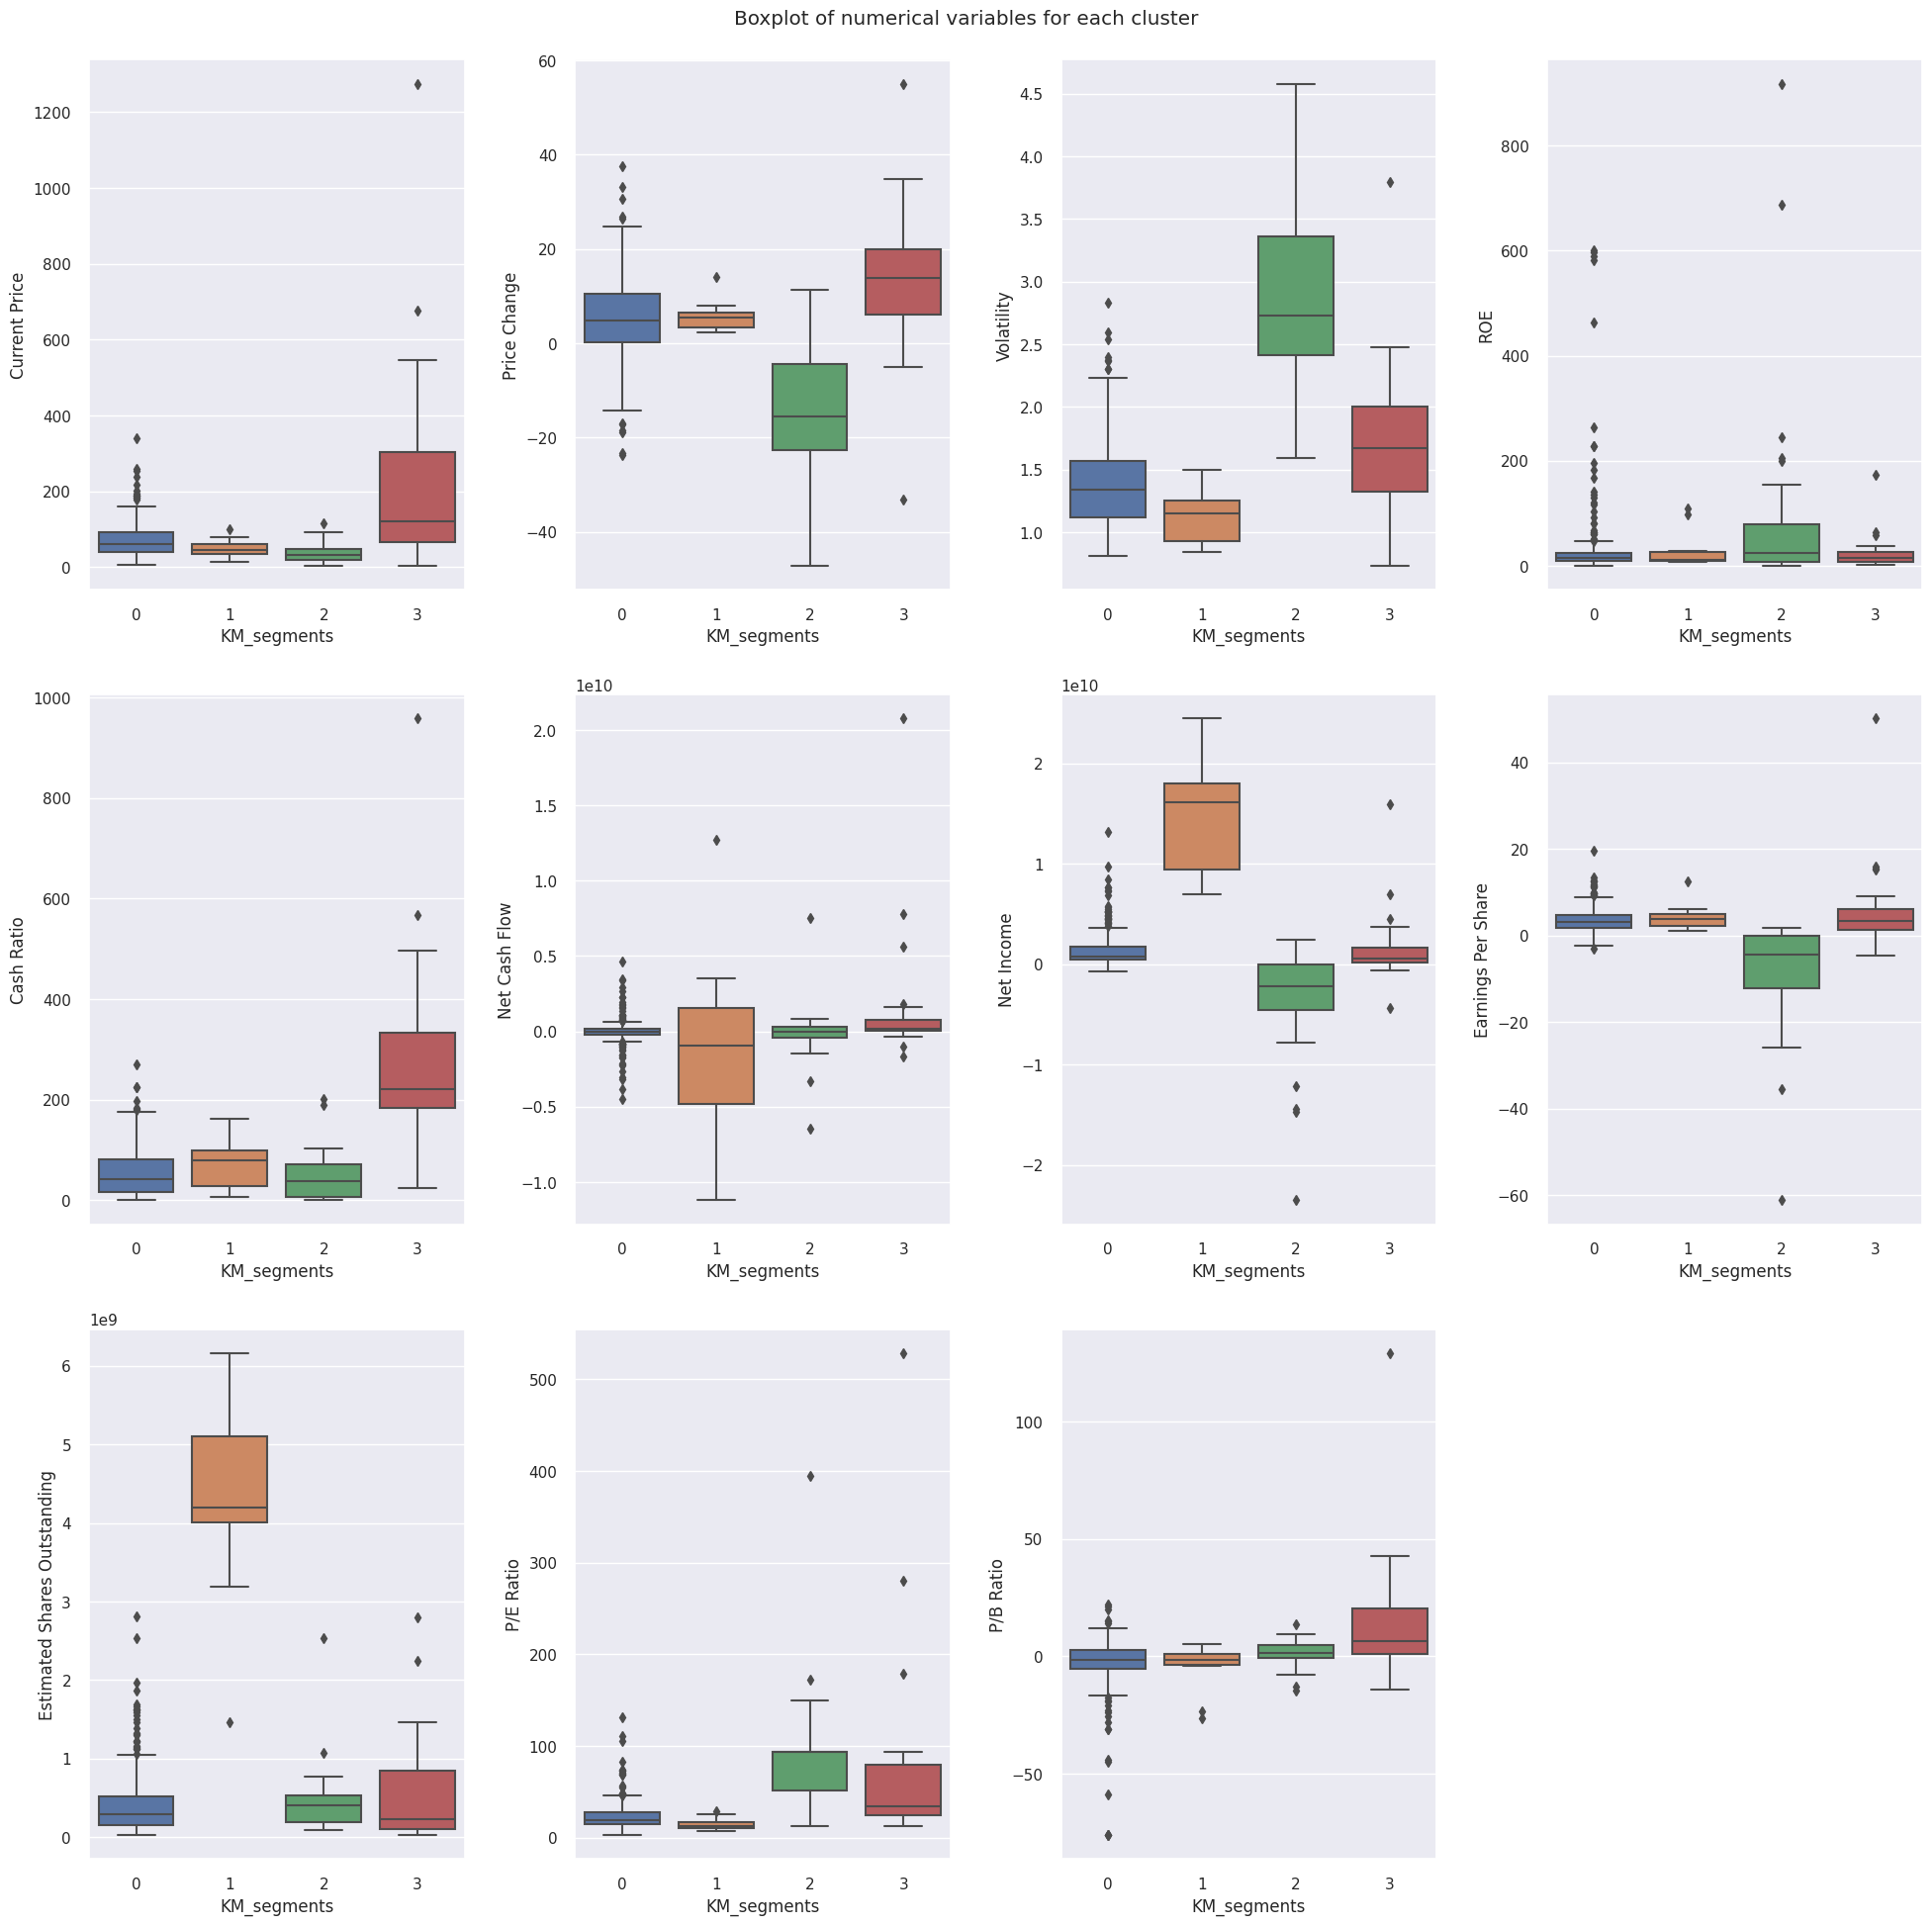

In [63]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

##Cluster 0.

• Comprised mostly of stocks within the Consumer Discretionary, Financials, Industrials, and Real Estate sectors.

• Companies with this cluster have:
• The average Current price is higher compared to clusters 1 and 2. The parent price is not reached 0$.

• The average price change is slightly higher than 0$. Also, the price changes negatively.

• The average Volatility is higher compared to cluster 1.

• The average ROE has almost the same compared to a different cluster.

• The average cash ratio is the lowest.

• The average net cash flow is close to 0 and has positive and negative outcomes.

• The average net income is close to 0$ and has a negative tendency.

• The average earning per share is close to 0$.

• The average of estimated shares outstanding is slightly higher than 0$.

• The average P/E ratio is slightly higher than 0$.

• The average P/B ratio is close to 0$ and has a negative tendency.

## Cluster 1.

• 11 stocks comprise with stocks Telecommunications services, Health Care, Financials, and Energy.

• Companies in this cluster have:

• The average current price is moderate and higher compared to cluster 2.

• The average price change is moderate and higher compared to clusters 2 and 0.

• The average volatility is the lowest.

• ROE is slightly higher than 0.

• The average Cash Ration is moderate and slightly higher compared to clusters 0 and 2.

• The average net cash flow is less than 0 and mostly negative. Even 75% is slightly higher than 0.

The average Net income is the highest compared to other clusters.
The average earning per share is higher compared to other clusters.

 The highest estimated shares outstanding.

P/E Ratio is close to 0 and positive.

The average of P/B Ra

tion is slightly less than 0 and has negative and positive outcomes.

## Cluster 2.

• 27 stocks, comprises mostly of stocks within Energy, Industrials, IT, and Materials.

• Companies in this cluster have:

• The average Current Price is the lowest.

• The average of the Price Change is the lowest.

• The average Volatility is the highest.

• The average ROE is the highest.

• The average Cash Ratio is moderate, lower than in clusters 1 and 3.

• The average Net Cash Flow is close to 0 and has negative and positive outcomes.

• The average Net Income is negative and 75% is close to 0.

• The average Earning Per Share is negative and 75% is close to 0.

• The average of Estimated Shares Outstanding is moderate. Higher than clusters 0 and 3.

• The average P/E ratio is higher compared to other clusters.

• The average P/B ratio is slightly higher than 0.

## Cluster 3.

• 25 stocks, comprises of stocks within Consumer Discretionary, Health Care, IT, and Real Estate.

• Companies in this cluster have:

• The average Current price is high compared to other clusters.

• The average Price Change is high compared to other clusters.

• The average Volatility is moderate, higher compared to clusters 0 and 1. Lower than cluster 2.

• The average ROE is slightly higher than 0.

• The average Cash Ration is high.

• The average Net Cash Flow is close to 0, with negative and positive outcomes.

• The average Net Income is close to 0.

• The average Earning Per share is positive.

• The average of Estimated Shares Outstanding is lower compared to other clusters.

• The P/E ratio is moderate.

• The average P/B ratio is higher compared to other clusters.



### Insights

-


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [64]:
hc_df = subset_scaled_df.copy()

In [65]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

• We see that the cophenetic correlation is maximum with Euclidean distance and the average linkage is 0.94.

• The highest cophenetic correlation is 0.94 with average linkage.

**Let's explore different linkage methods with Euclidean distance only.**

In [66]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

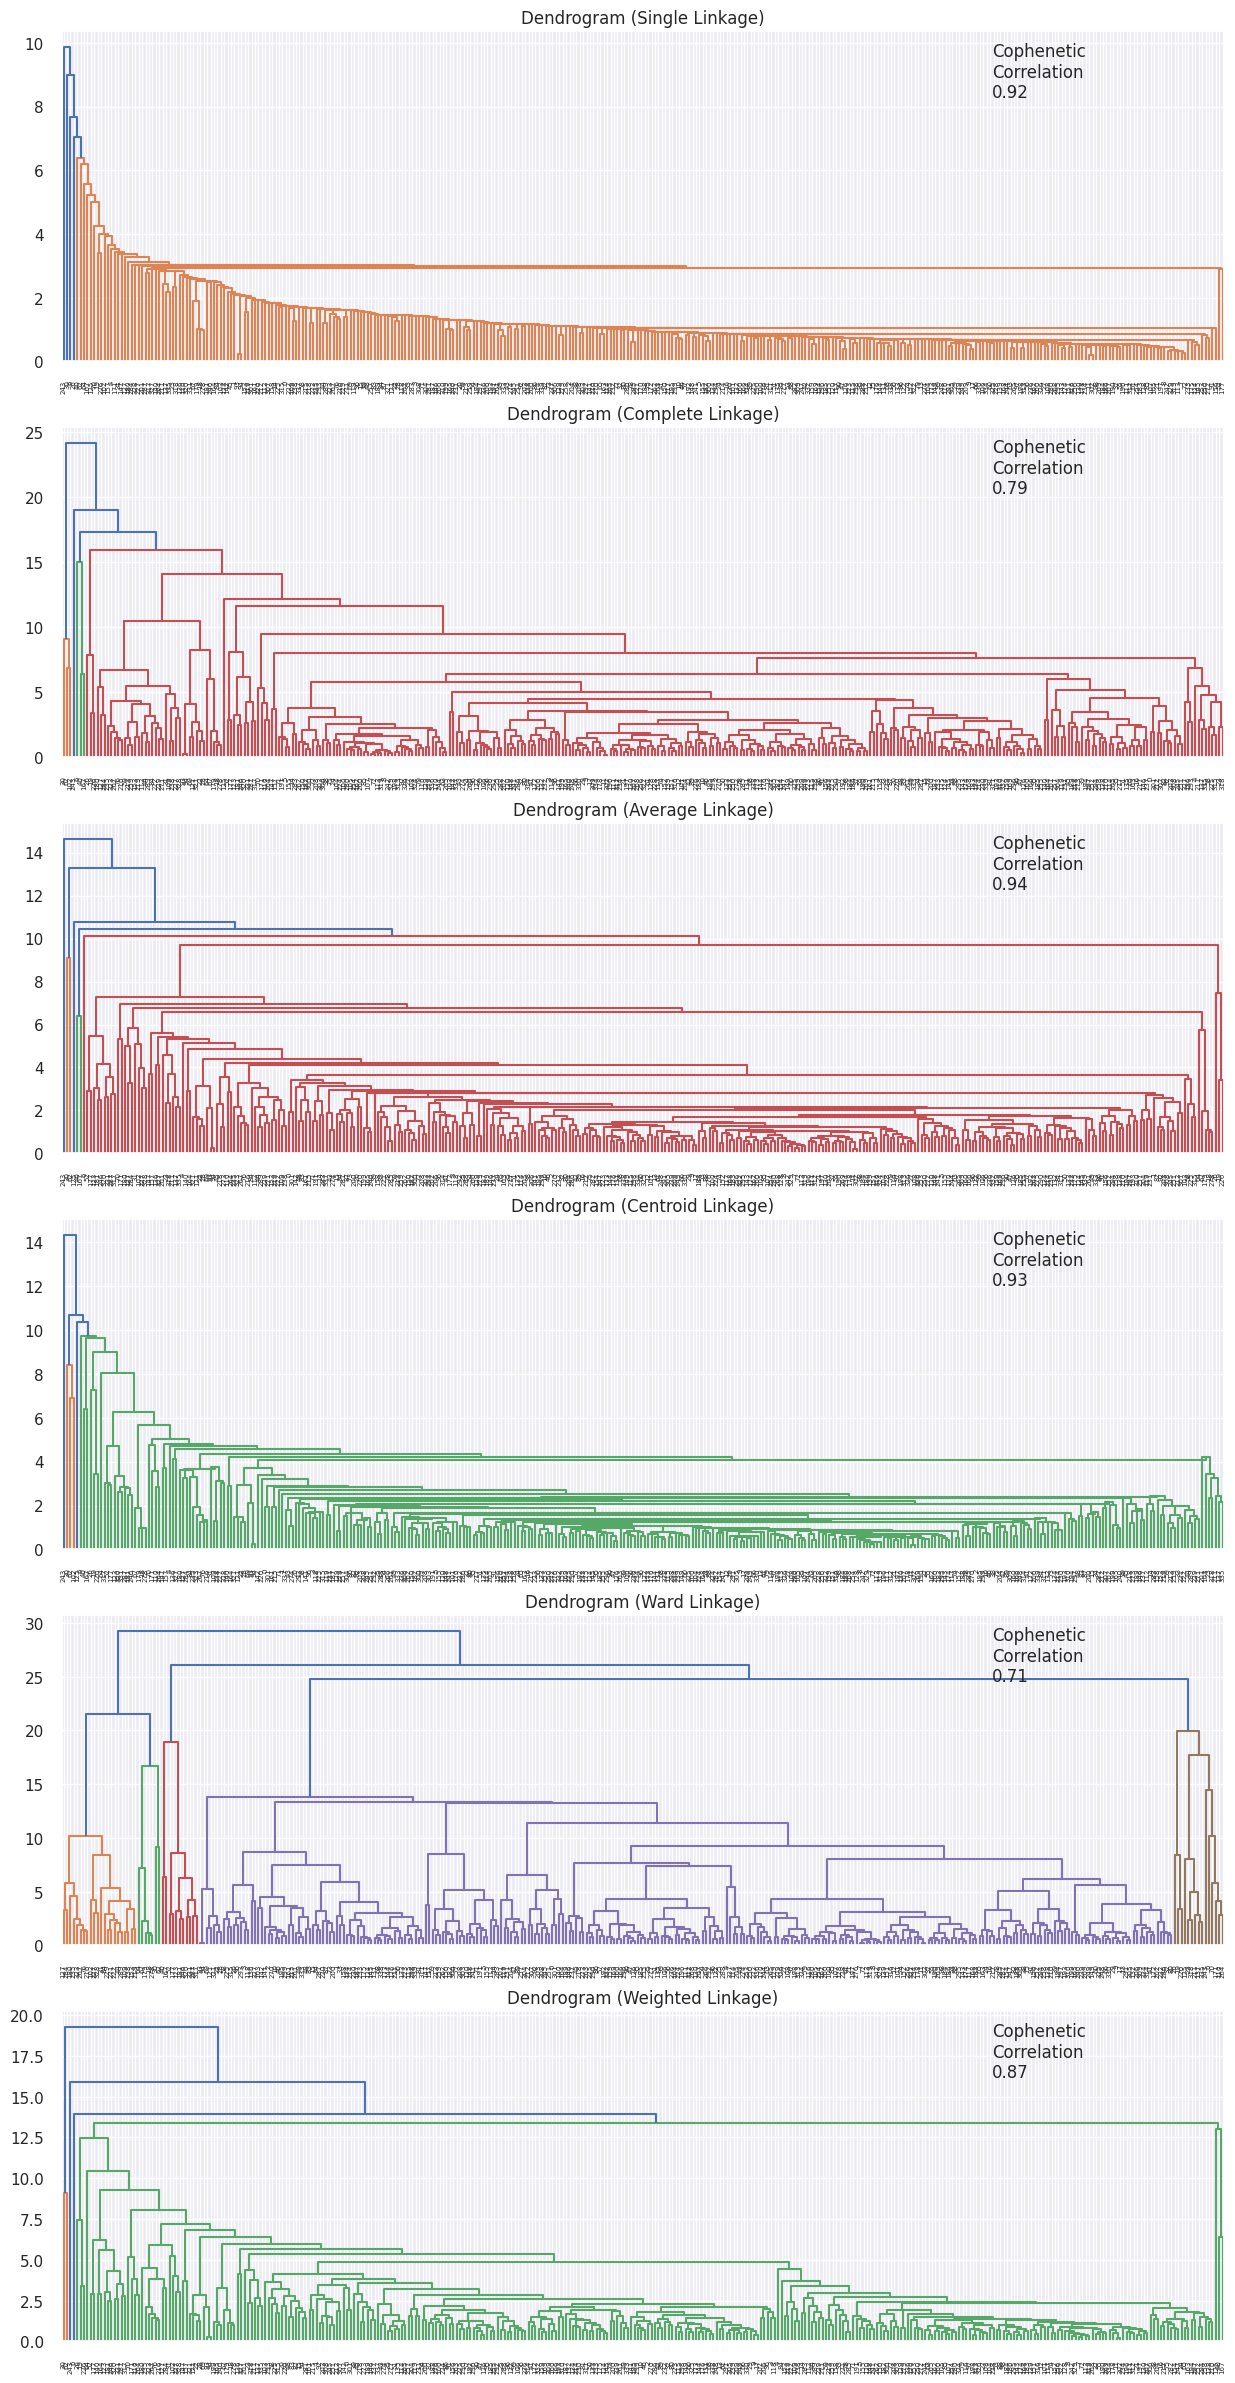

In [67]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

• The cophenetic correlation is highest for average and centroid linkage methods, but the dendrogram for average linkage appears to provide better clusters.

• 5 appears to be the appropriate number of clusters for the average linkage method.

In [68]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


### Creating model using sklearn

In [69]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [70]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [71]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [72]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [73]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3


• There are 2 clusters of one company and 2 clusters of two companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.

• In contrast, the dendrogram for Ward linkage appears to have more distinct and separated clusters (as seen from its dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [74]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 285
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 2, the following companies are present:
['Alliance Data Systems', 'Amgen Inc', 'Chipotle Mexican Grill', 'Equinix', 'Facebook', ..., 'Monster Beverage', 'Priceline.com Inc', 'Regeneron', 'Waters Corporation', 'Yahoo Inc.']
Length: 12
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Allegion', 'Apache Corporation', 'Chesapeake Energy', 'Charter Communications', 'Col

In [75]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Industrials                     0
             Information Technology          1
             Materials                       0
             Real Estate                     0
             Telecommunications Services     2
             Utilities                       0
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Health Care                     0
             Industrials                     1
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Teleco

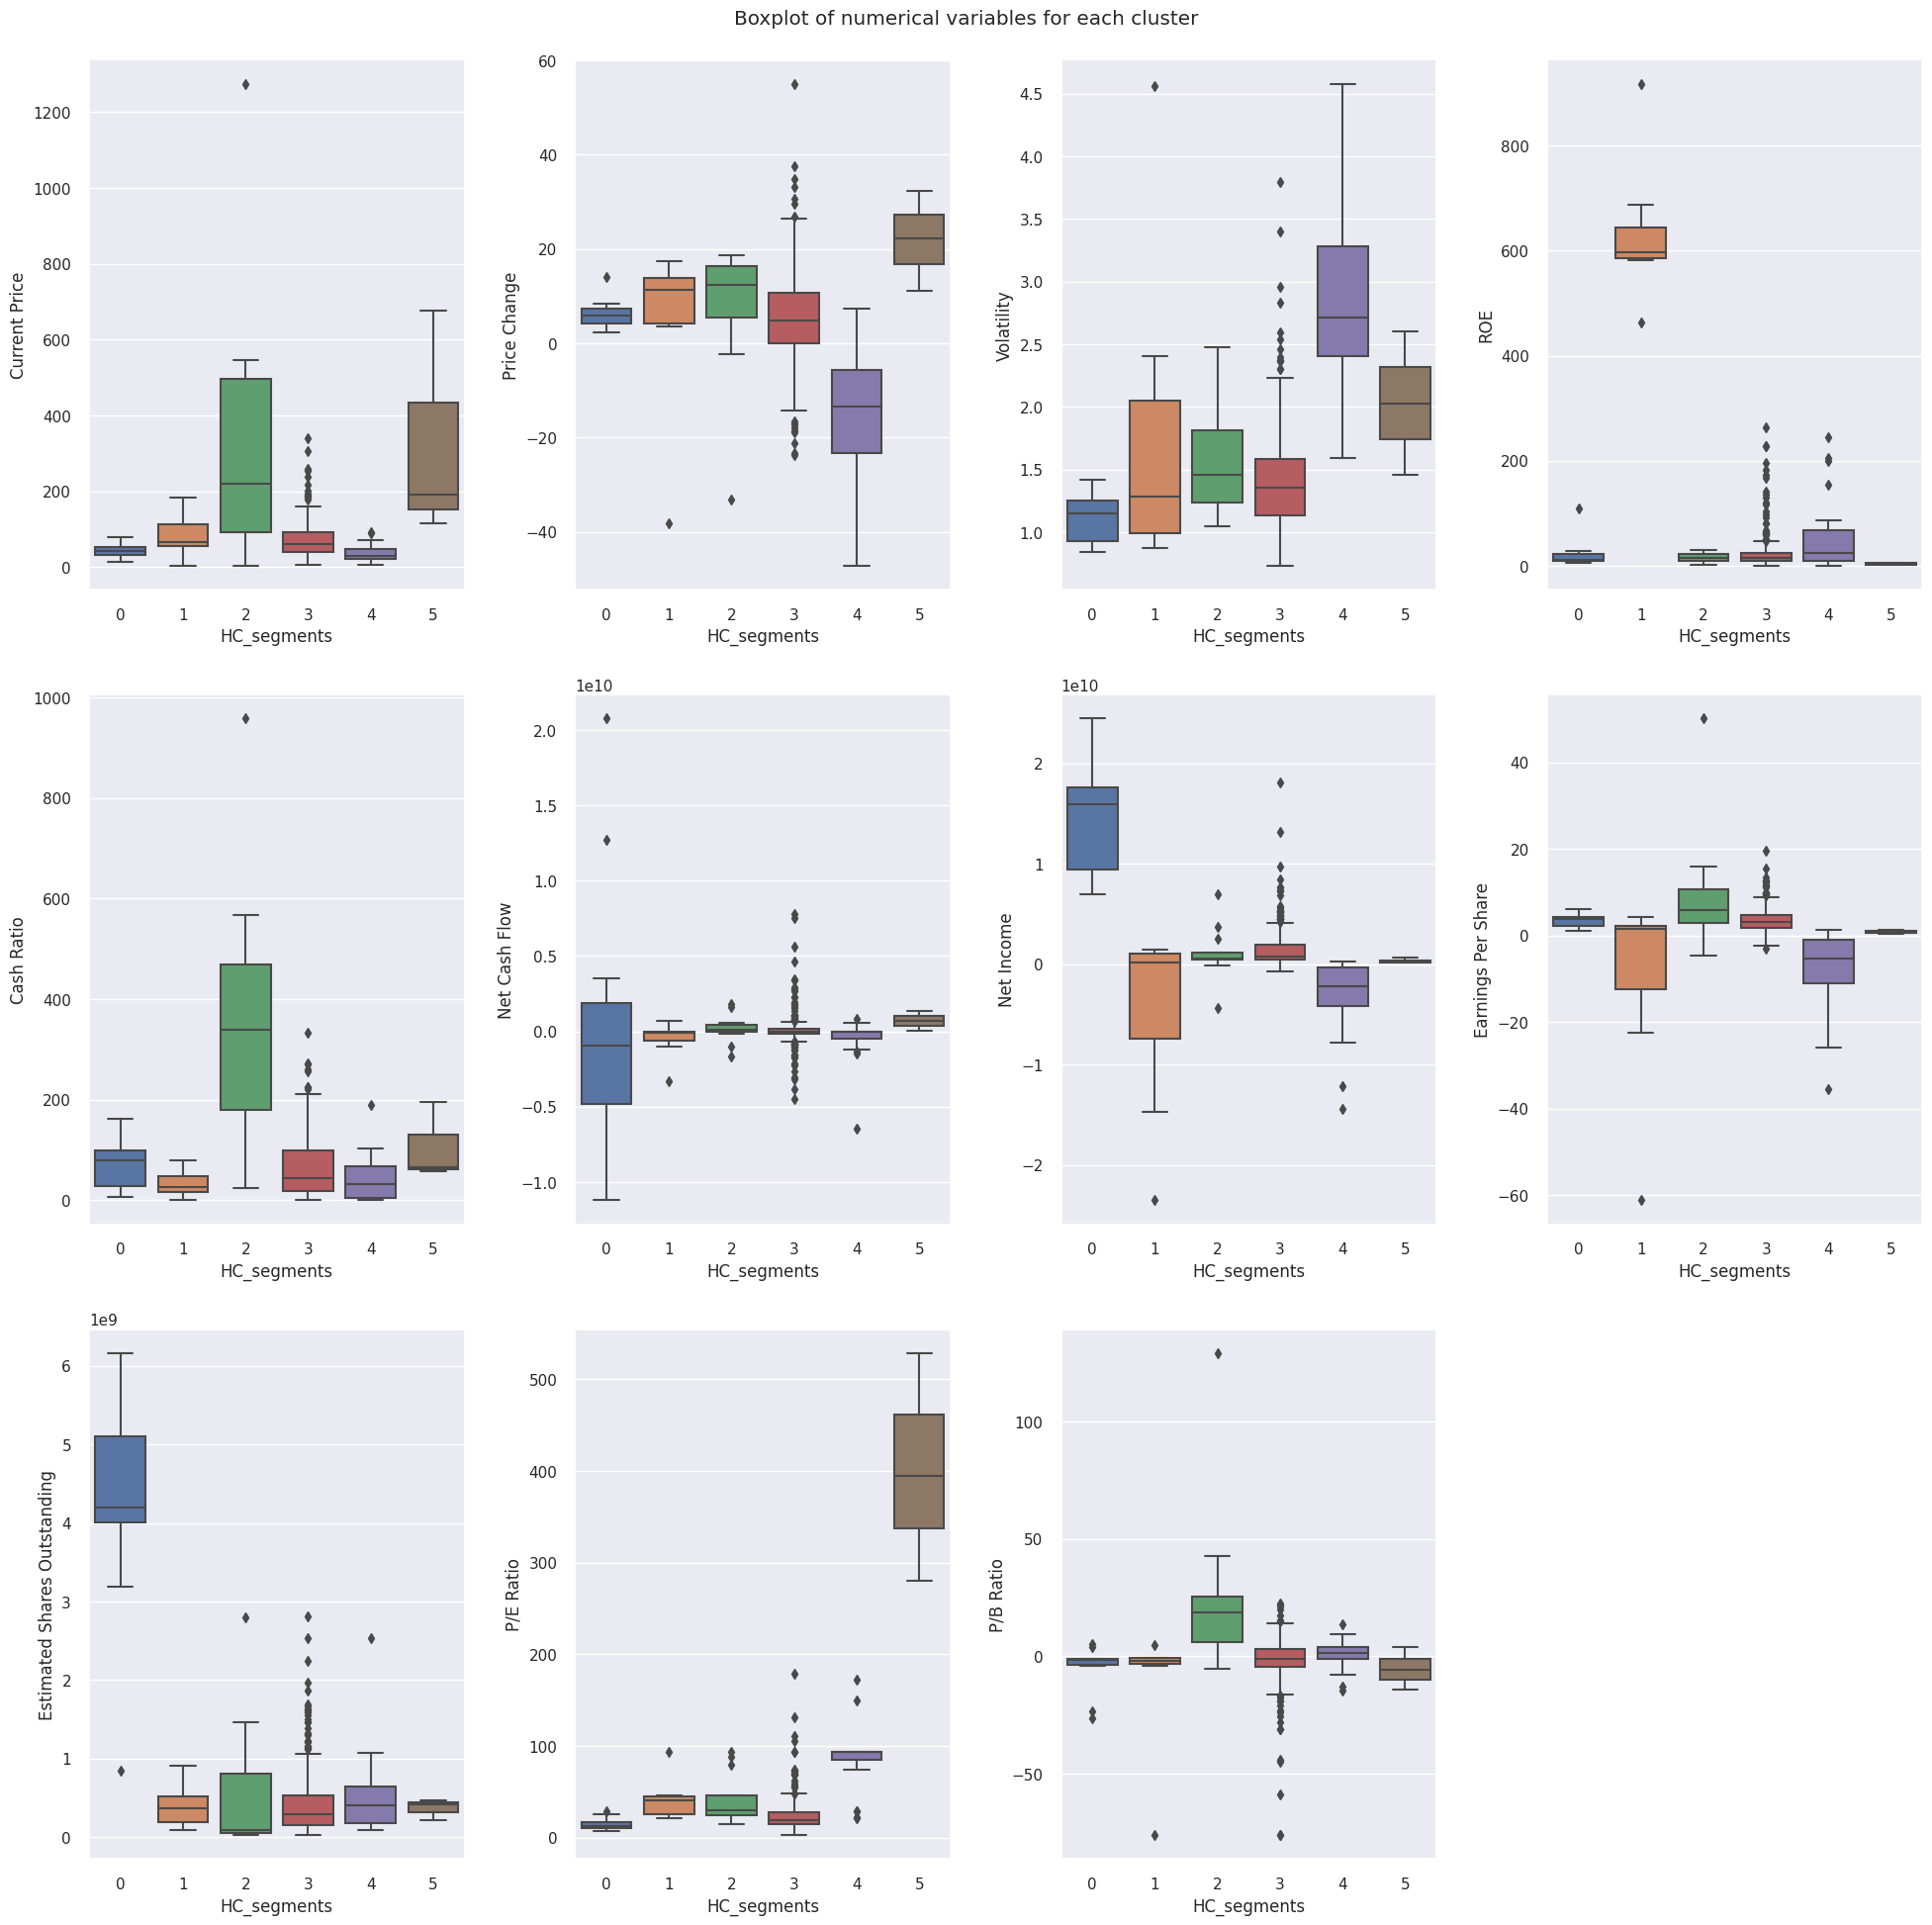

In [76]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

• Which clustering technique took less time for execution?
Both the KMeans model and the Agglomerative Clustering model fit the dataset within ~0.1s.

• Which clustering technique gave you more distinct clusters, or are they the same?

Both algorithms give similar clusters, with a single cluster of a majority of the stocks and the remaining clusters containing 4-27 stocks.

• How many observations are there in the similar clusters of both algorithms?

KMeans the model has optimal 4 cluster and Hierarchical clustering with the cophenetic correlation is highest for average and centroid linkage methods at 0.94. However, after clustering There are 2 clusters of one company and 2 clusters of two companies, and all the other companies are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability. Then the dendrogram for Ward linkage appears to have more distinct and separated clusters. 6 Clusters were chosen to analyze.

• How many clusters are obtained as the appropriate number of clusters from both algorithms?

KMeans obtained 4 clusters, Hierarchical Cluster obtained 6 clusters.

## Actionable Insights and Recommendations

• As expected, stocks offer uncertain returns with high upsides, mostly modest returns, and the omnipresent possibility that the value of the stock may become worthless (i.e., the company goes bankrupt)

• All of these variables contain a few or several outliers; however, none of these values appear to be unrealistic given the nature of stock prices and historical expectations.

• Volatility is negatively correlated with price change as a stock becomes more volatile, its price is likely to drop.

• Net income is also negatively correlated with volatility, as a company generates higher income its price is likely less volatile.

• Net income is positively correlated with earnings per share and estimated shares outstanding.

• Earning per share is positively correlated with current price as a company’s EPS rises, its prices are also highly to increase.

• EPS is negatively correlated with ROE, as a company generates more equity for shareholders, an equivalent amount of net income in the following periods will generate a lower return.

• The stocks of which economic sector have seen the maximum price increase on average are Health Care, followed
by Consumer suppliers, and Information Technology. The last sector, the price increase on average is Utilities. There is a negative tendency of price for the Energy industry.

• KMeans clustering analysis was implemented with 4 clusters, where Hierarchical clustering using Ward linkage was implemented with 6 clusters. Both algorithms give similar clusters, with a single cluster of a majority of the stocks.

• Trade&Ahead should first identify the financial goals, risk tolerance, and investment
behaviors of their clients, then recommend a cluster as a potential portfolio of stocks that will fit these needs.

• In general, the stocks in the same cluster (which were analyzed KMeans and Hierarchical cluster) have similar trading dynamic characteristics. Recommended stock for target investors, can improve the accuracy of recommended stocks and reduce the difficulty of
the search for other recommended stocks.

• Alternatively, Trade&Ahead could use these clusters as a starting point for further financial statement analysis, particularly which individual stocks do not fit the "profile" of the cluster.

• Assuming selecting individual stocks is a component of a client's investment strategy, Trade&Ahead may then be able to identify stocks that should outperform its peers (i.e., the price will rise = buy recommendation) or likely fall behind its peers (i.e., the price will fall = sell recommendation).